In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# if you do not have 'nltk', the following command should work "python -m pip install nltk"
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.4 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=9669512e4c118350c6fef146b5e86e11756149cc323790fd0a7a448d0d8fd340
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [4]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import json
import csv
import pandas as pd
import numpy as np
import re
import datetime
#from cleantext import clean
import matplotlib.pyplot as plt
import seaborn as sns

# **Functions**

In [5]:
def build_terms(line):

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))

    ## Transform into lowercase
    line=  line.lower()
    #Remove urls
    line = re.sub(r'http[s]?://\S+', '', line)
    #Remove punctuations marks
    line = re.sub(r'[!"$%&()*+,-./:;<=>?[\]^_`{|}~#]', ' ', line)
    #Remove emojis, symbols, pictograms...
    line = re.sub(r"["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", ' ', line)
    #Tokenize the text
    line =  line.split()
    #Remove stop-words
    line=[x for x in line if x not in stop_words]
    #Perform stemming
    line=[stemmer.stem(x) for x in line]

    return line

In [6]:
def extract_hashtags(content):
    # Find all words that begin with # symbol
    hashtags = re.findall(r'#\w+', content)
    return hashtags


In [7]:
def getCleanTweets(tweet):

  #Initialize an emtpy dictionary
  tweet_dict = {}

  # Get tweet ID
  tweet_dict['ID'] = tweet['id']

  # Get the tweet content
  tweet_dict['Tweet'] =tweet['content']

  # Get the clean tweet content
  tweet_dict['Procesed_Tweet'] = build_terms(tweet['content'])

  # Get the tweet date
  tweet_dict['Date'] = tweet['date']

  # Get the number of likes
  tweet_dict['Likes'] = tweet['likeCount']

  # Get the number of retweets
  tweet_dict['Retweets'] = tweet['retweetCount']

  # Get the url
  tweet_dict['URL'] = tweet['url']

  # Get the username
  tweet_dict['Username'] = '@' + tweet['user']['username']

  # Get the hashtags
  tweet_dict['Hashtags'] = extract_hashtags(tweet['content'])

  return tweet_dict

# **Cargar Información**

In [8]:
json_path = '/content/drive/Shareddrives/Information Retrieval and Web Analytics/data/farmers-protest-tweets.json'
csv_path = '/content/drive/Shareddrives/Information Retrieval and Web Analytics/data/tweet_document_ids_map.csv'

In [9]:
# Load the data of the json file into a dictionary
def read_json_to_dict(json_to_trans):
  trans_to_dict = [json.loads(line) for line in open(json_to_trans, 'r')]
  return trans_to_dict

In [10]:
data_json = read_json_to_dict(json_path)
print(', '.join(data_json[0].keys()))


url, date, content, renderedContent, id, user, outlinks, tcooutlinks, replyCount, retweetCount, likeCount, quoteCount, conversationId, lang, source, sourceUrl, sourceLabel, media, retweetedTweet, quotedTweet, mentionedUsers


In [11]:
#Load the data of the csv file into a dictionary
def read_csv_to_dict(csv_to_trans):
  data_col_names = ['doc', 'id']
  csv_read = pd.read_csv(csv_to_trans, sep=",", names=data_col_names)
  trans_to_dict = csv_read.to_dict('records')
  return trans_to_dict

In [12]:
data_csv = read_csv_to_dict(csv_path)


# **Clean Tweets**

In [13]:
def process_tweets(data_json, data_csv):

    # Initialize the empty dictionary where we will store the process tweets
    tweets = {}

    # We will transform the list of dictionaries to a dictionary with key id
    csv_dict = {str(row['id']): row['doc'] for row in data_csv}


    for tweet in data_json:
        # We make sure that the tweet id from the json and csv file are the same type of variable
        tweet_id = str(tweet['id'])

        # We look for the id of the json file into the csv file
        if tweet_id in csv_dict:
            doc_id = csv_dict[tweet_id]
            # We use the getCleanTweets Function to clean each tweet of the function
            cleaned_tweet = getCleanTweets(tweet)
            # We add the cleaned tweet to the dictionary with the doc_id as the key

            tweets[doc_id] = cleaned_tweet

    return tweets

In [14]:
get_tweets = process_tweets(data_json, data_csv)

In [15]:
get_tweets['doc_1']

{'ID': 1364506237451313155,
 'Tweet': "#FarmersProtest \n#ModiIgnoringFarmersDeaths \n#ModiDontSellFarmers \n@Kisanektamorcha \nFarmers constantly distroying crops throughout India. \nReally, it's hearts breaking...we care about our crops like our children. And govt. agriculture minister is laughing on us🚜🌾WE WILL WIN💪 https://t.co/kLspngG9xE",
 'Procesed_Tweet': ['farmersprotest',
  'modiignoringfarmersdeath',
  'modidontsellfarm',
  '@kisanektamorcha',
  'farmer',
  'constantli',
  'distroy',
  'crop',
  'throughout',
  'india',
  'realli',
  'heart',
  'break',
  'care',
  'crop',
  'like',
  'children',
  'govt',
  'agricultur',
  'minist',
  'laugh',
  'us',
  'win'],
 'Date': '2021-02-24T09:23:32+00:00',
 'Likes': 0,
 'Retweets': 0,
 'URL': 'https://twitter.com/PrdeepNain/status/1364506237451313155',
 'Username': '@PrdeepNain',
 'Hashtags': ['#FarmersProtest',
  '#ModiIgnoringFarmersDeaths',
  '#ModiDontSellFarmers']}

# **Exploratory Data Analysis**

## Top Words & Top Hashtags

In [16]:
def plot_top_10(dic):
    # we order the dictionary by values in descending order and get the top 10
    top_10 = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True)[:10])

    # We obtain the keys and the values
    keys = list(top_10.keys())
    values = list(top_10.values())

    # We create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(keys, values, color='magenta', alpha=0.7)
    plt.title('Top 10 ')
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.xticks(rotation=45)  #We rotate x labels for better visibility
    plt.grid(axis='y')
    plt.tight_layout()  #Avoid overlap
    plt.show()

In [17]:
def word_count(dic):
  words = {}
  #Here we count the frequency of each of the words of the procesed tweets
  for tweet in dic:
    for word in dic[tweet]['Procesed_Tweet']: #for each token
      if word in words: #if it has already appeared, add 1 to frequency
        words[word] += 1
      else: #it is the first appearance
        words[word] = 1

  #we order the dictionary of frequencies by values in descending order
  word_count = dict(sorted(words.items(), key = lambda item:item[1], reverse = True))
  return word_count

In [18]:
frequency_words = word_count(get_tweets)
top_5_words = dict(list(frequency_words.items())[:5]) #we get the 5 most repeated words
for i, word in enumerate(top_5_words, 1):
  print(f"Top {i}: {word} --> {top_5_words[word]}")


Top 1: farmersprotest --> 50454
Top 2: farmer --> 16877
Top 3: india --> 7332
Top 4: support --> 6028
Top 5: protest --> 4802


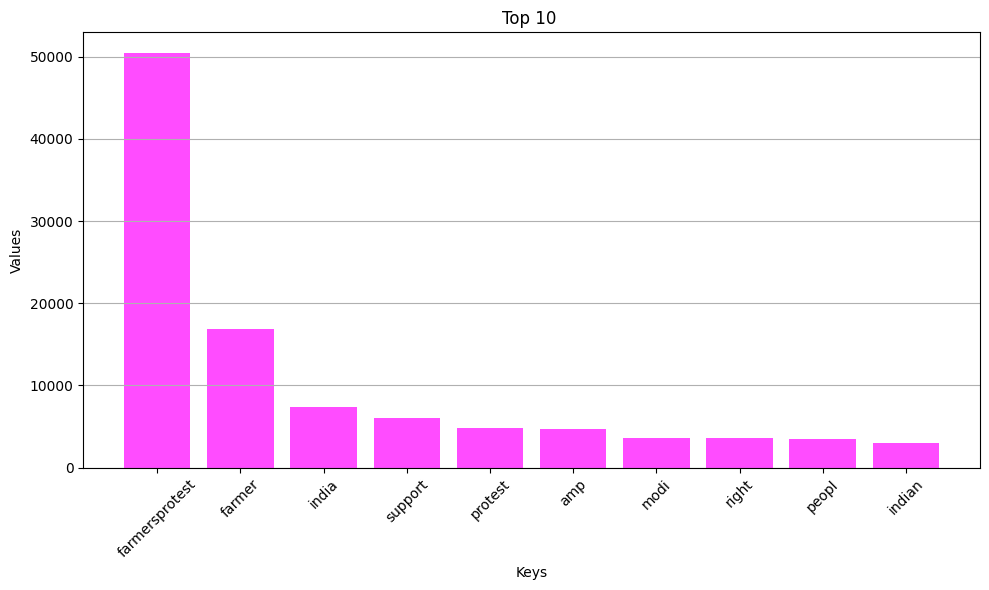

In [19]:
plot_top_10(frequency_words)

In [20]:
def hashtag_count(dic):
  hashtags = {}
  #Here we count the frequency of each of the hashtags
  for tweet in dic:
    for hashtag in dic[tweet]['Hashtags']:
      if hashtag in hashtags: #if it has already appeared, add 1 to frequency
        hashtags[hashtag] += 1
      else: #it is the first appearance
        hashtags[hashtag] = 1

  #we order the dictionary of frequencies by values in descending order
  hashtag_count = dict(sorted(hashtags.items(), key = lambda item:item[1], reverse = True))
  return hashtag_count

In [21]:
frequency_hashtags = hashtag_count(get_tweets)
top_5_hashtags = dict(list(frequency_hashtags.items())[:5]) #we get the 5 most repeated hashtags
for i, hashtag in enumerate(top_5_hashtags, 1):
  print(f"Top {i}: {hashtag} --> {top_5_hashtags[hashtag]}")

Top 1: #FarmersProtest --> 45856
Top 2: #ReleaseDetainedFarmers --> 2430
Top 3: #farmersprotest --> 2305
Top 4: #FarmersMakeIndia --> 2129
Top 5: #IndiaBeingSilenced --> 2128


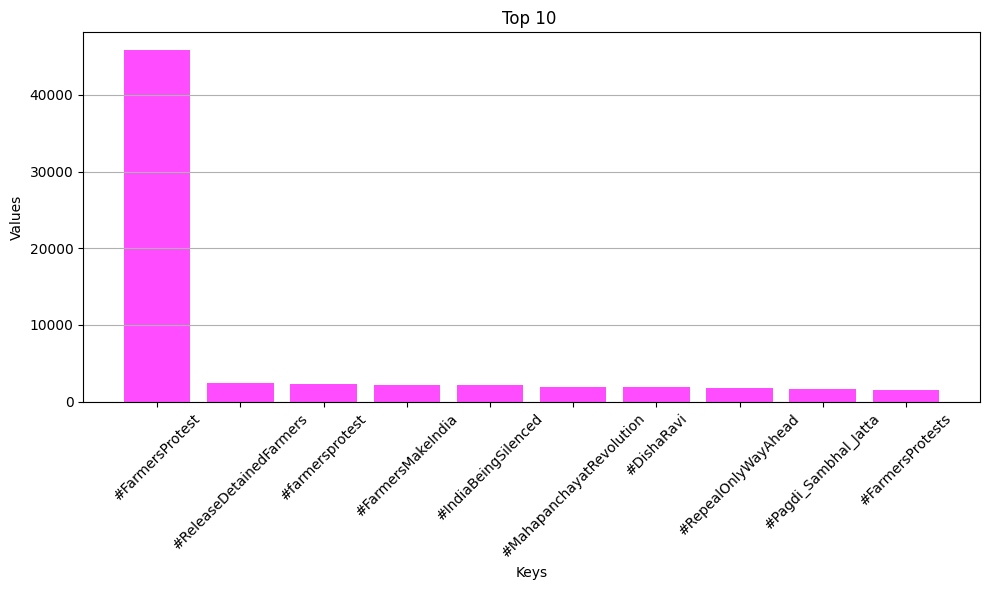

In [22]:
plot_top_10(frequency_hashtags)

## Average Sentence length

In [23]:
def avg_length(dic):
  sum = 0
  for tweet in dic: #for each tweet
    sum += len(dic[tweet]['Procesed_Tweet']) #sum the number of tokens
  return sum / len(dic)


In [35]:
average_tweets_length = avg_length(get_tweets)
print('The average length of the tweets is', average_tweets_length)

The average length of the tweets is 14.699498234528898


## Most retweeted tweets

In [25]:
def most_retweeted(dic):
  retweeted = {}
  for doc_id in dic:
    content = dic[doc_id]['Tweet'] #get the content of each tweet
    retweeted[content] = dic[doc_id]['Retweets'] #we create a dictionary with content: num_retweets
  #we order the dictionary by values in descending order
  retweeted = dict(sorted(retweeted.items(), key = lambda item:item[1], reverse = True))
  return retweeted

In [26]:
retweeted_tweets = most_retweeted(get_tweets)
top_5_retweeted = dict(list(retweeted_tweets.items())[:5])
for tweet in top_5_retweeted:
  print('Nº of retweets: ', top_5_retweeted[tweet], '\n','Content: ', tweet)


Nº of retweets:  6164 
 Content:  There's a #FarmersProtest happening in Germany.

But the German Govt didn’t block their path with barbed wires, dig highways or label them Anti-National. And neither did the Govt declare it an ‘internal matter’ where others can’t comment. I guess that’s how democracies work. https://t.co/pZtigTgWT8
Nº of retweets:  4673 
 Content:  disha ravi, a 21-year-old climate activist, has been arrested by delhi police for sharing a toolkit @GretaThunberg  posted in support of the #farmersprotest. 

disha’s arrest is alarming and the world needs to pay attention. #freedisharavi

https://t.co/IYGsLpNjwZ
Nº of retweets:  3742 
 Content:  Disha Ravi broke down in court room and told judge that she had merely edited two lines in the toolkit and was supporting farmers. What is wrong in that? This is how this nation treats anyone who spreads awareness. #FarmersProtest
Nº of retweets:  3332 
 Content:  Farmers are so sweet. Y’all have to see this @AmandaCerny @rihanna 🖤

## Word Cloud

In [27]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

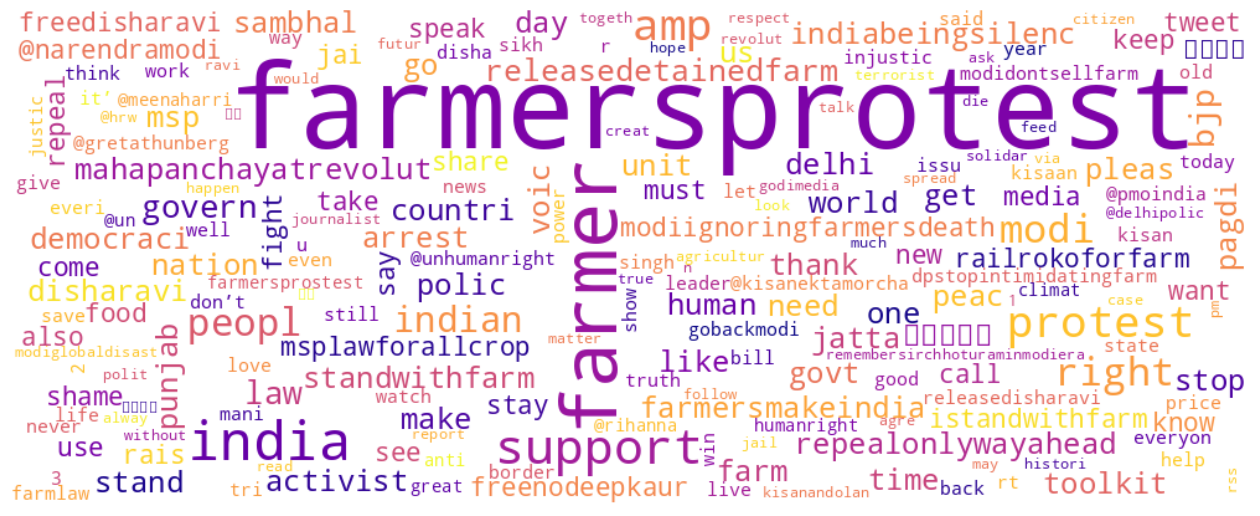

In [28]:
# Generate the word cloud with the most frequent words
genre_wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap= 'plasma')
genre_wordcloud.generate_from_frequencies(dict(frequency_words))

# Plot the word cloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

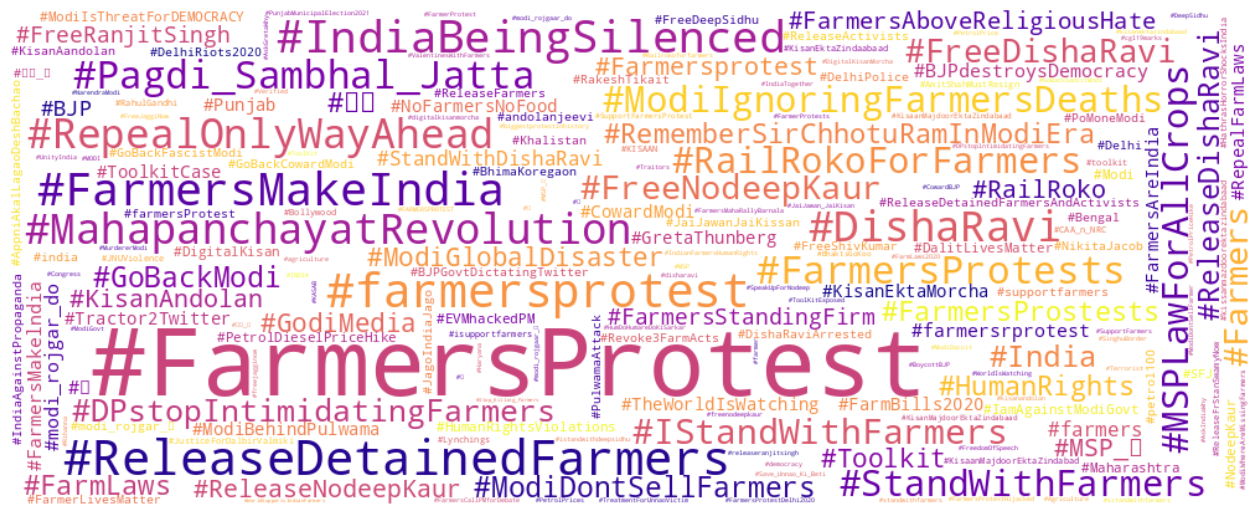

In [29]:
# Generate the word cloud with the most frequent hashtags
genre_wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap= 'plasma')
genre_wordcloud.generate_from_frequencies(dict(frequency_hashtags))

# Plot the word cloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Vocabulary Size

In [30]:
#We use the dictionary of word frequencies
print("The vocabulary size of the pre-processed tweets is", len(frequency_words))
print("Average number of unique words per tweet:", round(len(frequency_words)/len(get_tweets), 3))

The vocabulary size of the pre-processed tweets is 38922
Average number of unique words per tweet: 0.804


## Most active users

In [31]:
def most_active_users(dic):
  usernames = {}
  #Here we count the frequency of each of the usernames that posted a tweet
  for doc_id in dic:
    username = dic[doc_id]['Username'] #for each username that posted a tweet
    if username in usernames: #if it has already appeared, add 1 to frequency
      usernames[username] += 1
    else: #it is the first appearance
      usernames[username] = 1

  #we order the dictionary of frequencies by values in descending order
  usernames_count = dict(sorted(usernames.items(), key = lambda item:item[1], reverse = True))
  return usernames_count

In [32]:
active_users = most_active_users(get_tweets)
top_5_users = dict(list(active_users.items())[:5]) #we get the 5 most repeated hashtags
for i, username in enumerate(top_5_users, 1):
  print(f"Top {i}: {username} --> posted {top_5_users[username]} tweets")

Top 1: @jot__b --> posted 679 tweets
Top 2: @shells_n_petals --> posted 489 tweets
Top 3: @KaurDosanjh1979 --> posted 423 tweets
Top 4: @DigitalKisanBot --> posted 368 tweets
Top 5: @ish_kayy --> posted 366 tweets


## Most used emojis

In [33]:
def emoji_count(dic):
  #We compile all the emoji patterns used above in the build terms function
  emojis = re.compile(r"["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

  emojis_count = {}
  for doc_id in dic:
    content = dic[doc_id]['Tweet'] #Get the whole content of each tweet
    find_emojis = emojis.findall(content) #Get the emojis that appear in the tweet

    for emoji in find_emojis:
      if len(emoji) != 1: #we are checking the case that appear more than one emoji together without spaces
        for i in range(len(emoji)):
          if emoji[i] in emojis_count:
            emojis_count[emoji[i]] += 1
          else:
            emojis_count[emoji[i]] = 1
      else: #we are checking when there is only one emoji
        if emoji in emojis_count:
          emojis_count[emoji] += 1
        else:
          emojis_count[emoji] = 1

  #we order the emojis frequencies by descending order
  mostused_emojis = dict(sorted(emojis_count.items(), key=lambda item: item[1], reverse=True))
  return mostused_emojis


In [34]:
frequency_emojis = emoji_count(get_tweets)
top_10_emojis = dict(list(frequency_emojis.items())[:10]) #we get the 10 most repeated hashtags
for i, emoji in enumerate(top_10_emojis, 1):
  print(f"Top {i}: {emoji} --> {top_10_emojis[emoji]}")

Top 1: 🙏 --> 3508
Top 2: 🚜 --> 1687
Top 3: ️ --> 1611
Top 4: 🇳 --> 1525
Top 5: 🇮 --> 1520
Top 6: 🏻 --> 1311
Top 7: 🌾 --> 1059
Top 8: ✊ --> 1008
Top 9: 😂 --> 885
Top 10: ❤ --> 872
